<H3><B>NAME:</B>R AKHILANDESHWARI<BR>
<B>REG NO:</B> 2048046<BR>
<B>CONCEPTS:</B> pivot(), pivot_table(),query()</H3><BR>



<b><h2><u><center>ANALYSIS OF DATA</u></center></b></h2>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_excel('/content/SuperMart_PivotTable.xlsx')
data.head()

,Customer Name,Segment,City,State,Category,Sub-Category,Sales_in_M$,Qty
0,Claire Gute,Consumer,Henderson,Kentucky,Furniture,Bookcases,261.9600,452
1,Claire Gute,Consumer,Henderson,Kentucky,Furniture,Chairs,731.9400,19356
2,Darrin Van Huff,Corporate,Los Angeles,California,Office Supplies,Labels,14.6200,6986
3,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,Furniture,Tables,957.5775,7554
4,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,Office Supplies,Storage,22.3680,18992


In [ ]:
data.columns

Index(['Customer Name', 'Segment', 'City', 'State', 'Category', 'Sub-Category',
       'Sales_in_M$', 'Qty'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9800 non-null   object 
 1   Segment        9800 non-null   object 
 2   City           9800 non-null   object 
 3   State          9800 non-null   object 
 4   Category       9800 non-null   object 
 5   Sub-Category   9800 non-null   object 
 6   Sales_in_M$    9800 non-null   float64
 7   Qty            9800 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 612.6+ KB


In [ ]:
#To find whether the data contains duplicates or not
data[data.duplicated()].sum()

Customer Name    0.0
Segment          0.0
City             0.0
State            0.0
Category         0.0
Sub-Category     0.0
Sales_in_M$      0.0
Qty              0.0
dtype: float64

In [ ]:
#To find whether there are null values in the data
data.isnull().sum()

Customer Name    0
Segment          0
City             0
State            0
Category         0
Sub-Category     0
Sales_in_M$      0
Qty              0
dtype: int64

There are no duplicate records and null values in the given data

,Sales_in_M$,Qty
Sales_in_M$,1.000000,0.019416
Qty,0.019416,1.000000


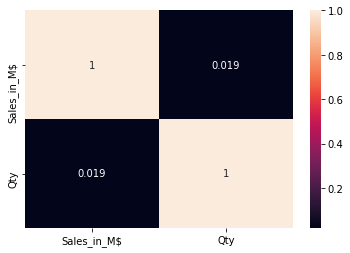

In [ ]:
#To find the dependencies between the variables
c= data.corr()
sns.heatmap(c,annot=True)
c

The dependency between the Sales_in_M$ and Qty is not highly positive correlated.

In [ ]:
#To find the number of unique customers, cities and states that are including in the sales data  
data.rename(columns = {'Customer Name':'Cust_Name'}, inplace = True) 
print("The Unique customers are: ",data.Cust_Name.nunique())
print("The Number of cities targeted are : ",data.City.nunique())
print("The Number of states targeted are: ",data.State.nunique())

The Unique customers are:  793
The Number of cities targeted are :  529
The Number of states targeted are:  49


<b><h2><u><center>PIVOT TABLES</u></center></b></h2>


In [ ]:
Segment_Cust=pd.pivot_table(data,index=['Segment','Cust_Name'])
Segment_Cust.head()

Qty  Sales_in_M$
Segment  Cust_Name                                    
Consumer Aaron Bergman        7900.166667   147.692667
         Adam Shillingsburg  11204.000000   130.212400
         Adrian Barton       10509.600000   723.678550
         Aimee Bixby          9594.500000    80.559167
         Alan Barnes          8554.714286    79.559857

I have gathered the data based on the index Segment and Cust_Name

In [ ]:
Cate_SubCate=pd.pivot_table(data,index=['Category', 'Sub-Category'],aggfunc={"Qty":len,"Sales_in_M$":np.sum})
Cate_SubCate.head()

Qty  Sales_in_M$
Category        Sub-Category                  
Furniture       Bookcases     226  113813.1987
                Chairs        607  322822.7310
                Furnishings   931   89212.0180
                Tables        314  202810.6280
Office Supplies Appliances    459  104618.4030

I have used aggregate functions on the Qty and Sales_in_M$ that are indexed based on the Category and Sub-Category.

In [ ]:
City_Sales_Qty=pd.pivot_table(data,index=['City'],aggfunc=np.sum)
City_Sales_Qty.head()

,Qty,Sales_in_M$
City,,
Aberdeen,14925,25.500
Abilene,12347,1.392
Akron,187823,2724.244
Albuquerque,135393,2220.160
Alexandria,169060,5519.570


I have summarized the data based on the City

In [ ]:
State_City_Sales_Qty=pd.pivot_table(data,index=['State','City'],aggfunc={"Qty":len,"Sales_in_M$":np.sum})
State_City_Sales_Qty.head()

Qty  Sales_in_M$
State   City                        
Alabama Auburn        6      1766.83
        Decatur      13      3374.82
        Florence      5      1997.35
        Hoover        4       525.85
        Huntsville   10      2484.37

Summarized the data, based on the City under the state by aggregating the Qty and Sales_in_M$.

<b><h2><u><center>QUERYING</u></center></b></h2>


In [ ]:
data.columns =[column.replace("-", "_") for column in data.columns]
data.columns

Index(['Cust_Name', 'Segment', 'City', 'State', 'Category', 'Sub_Category',
       'Sales_in_M$', 'Qty'],
      dtype='object')

I have replaced the whitespace with the underscore for the column value.

In [ ]:
Corp=Segment_Cust.query('Segment=="Corporate"')
print("The Corporate segment Data :\n",Corp.head())
Tech=Cate_SubCate.query('Category=="Technology"')
print("The Furniture Category objects a:\n",Tech.head())

The Corporate segment Data :
                                       Qty  Sales_in_M$
Segment   Cust_Name                                   
Corporate Aaron Hawkins      10896.545455   158.609091
          Aaron Smayling      7277.900000   305.069200
          Adam Hart          10491.450000   162.516850
          Alan Haines         8264.125000   198.431500
          Alan Schoenberger   9925.384615   327.752615
The Furniture Category objects a:
                          Qty  Sales_in_M$
Category   Sub-Category                  
Technology Accessories   756   164186.700
           Copiers        66   146248.094
           Machines      115   189238.631
           Phones        876   327782.448


TO collect the details of Corporate Sales in Segment dataframe and Technology in sub-category dataframe, I have used the query() on the pivot tables Segment_Cust and Cate_SubCate that were created earlier.

<CENTER><H2><B><U>GRAPHS</B></U><br>Plotted graphs using pivot()</CENTER></H2><BR>


                  Qty
Segment              
Consumer     51675115
Corporate    30061691
Home Office  17543746 





array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f421f525b38>],
      dtype=object)

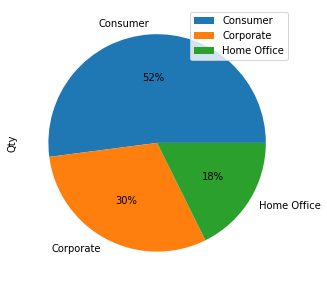

In [ ]:
Segm = data.groupby('Segment')[['Qty']].sum()
print(Segm.sort_values(by='Qty', ascending=False),"\n\n\n")

#Pie plot
Segm.plot.pie(subplots=True,autopct='%1.0f%%',figsize=(10,5))

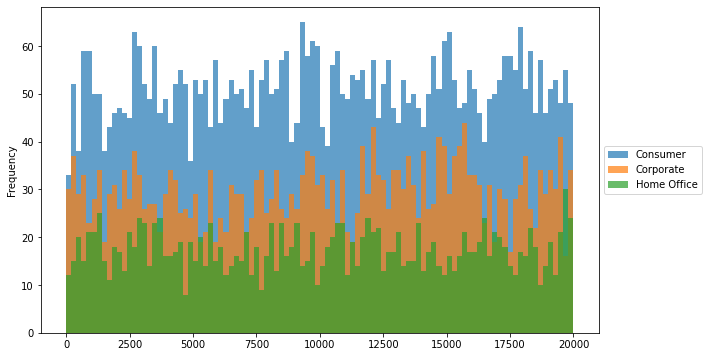

In [ ]:
#I have pivoted the table based on the 
data_segment=data.pivot(columns='Segment', values='Qty')
data_segment.plot.hist(bins=100, figsize=(10,6), alpha=0.7)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

                      Qty
Category                 
Office Supplies  59145077
Furniture        21498397
Technology       18637078 





array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f422d62e048>],
      dtype=object)

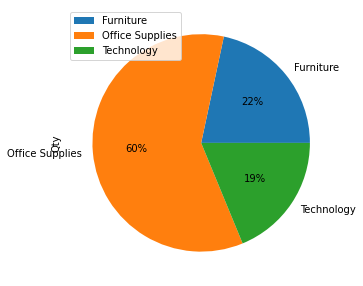

In [ ]:
cate = data.groupby('Category')[['Qty']].sum()
print(cate.sort_values(by='Qty', ascending=False),"\n\n\n")

#Pie plot
cate.plot.pie(subplots=True,autopct='%1.0f%%',figsize=(10,5))

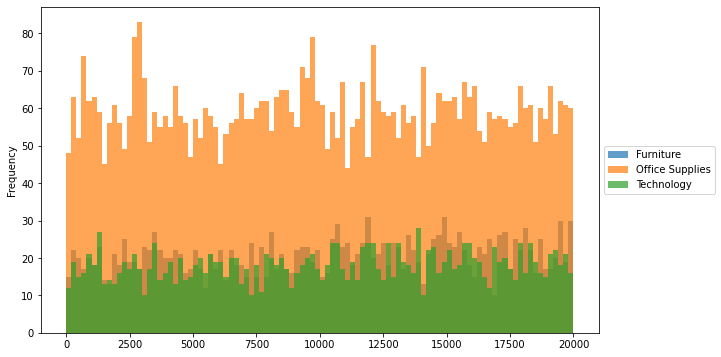

In [ ]:
data_Cate=data.pivot(columns='Category', values='Qty')
data_Cate.plot.hist(bins=100, figsize=(10,6), alpha=0.7)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

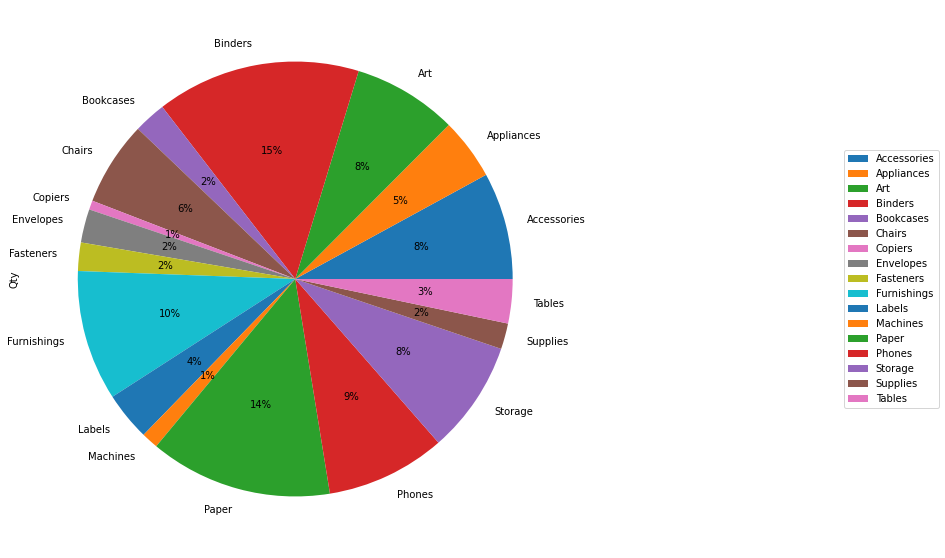

In [ ]:
Sub_Cat = data.groupby('Sub_Category')[['Qty']].sum()

#Pie plot
Sub_Cat.plot.pie(subplots=True,autopct='%1.0f%%',figsize=(20,10))
plt.gca().legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

<CENTER><H2><B><U>INFERENCE:</B></U></CENTER></H2><BR>

<b>DATA ANALYSIS</B><BR>
1. There are no duplicate records and null values in the given data.

2. The dependency between the Sales_in_M$ and Qty is not highly positive correlated.

3. The Unique customers are:  793

4. The Number of cities targeted are :  529

5. The Number of states targeted are:  49

6. The Consumer Segment is more than Corporate, and the Corporate is more than the Home Office.

7. In Category the office suply is more than Furnitures, and the furniture is more than Technology are in good sale.

8. In Sub_Categories the Binders,Papers,Phones,Storage and furnishing are in good sale.

<br><br>

<b>DATA INTERPRETATION</B><BR>
Based on the analysis, the Amazon CEO Mr. Jeff Bezos have to target the 793 consumers, with much focus on the consumer segment. Moreover, he have to increase his Office supply and FFurnitures Stock. And he need to market more on the Technology accessories.







